***Analysation of data corresponding to San Francisco School District***

In [0]:
import numpy as np
import pandas as pd
import os
import io
from io import StringIO

In [0]:
from google.colab import files
uploaded=files.upload()

Saving dataset.csv to dataset (2).csv


In [0]:
dat=pd.read_csv(io.BytesIO(uploaded['dataset.csv']))


In [0]:
dat.info()

In [0]:
dat.head()

Filling the rolls

In [0]:
for ind,row in dat.iterrows():
  dat.Roll[ind]=ind+2  
#thereby filling roll numbers

In [0]:
df=dat.copy()
df.rename(columns = {'CT-1 (Marks: 20)':'CT_1'}, inplace = True)
df.rename(columns = {'CT-2 (Marks: 20)':'CT_2'}, inplace = True)
df.rename(columns = {'CT-3 (Marks: 20)':'CT_3'}, inplace = True)
df.rename(columns = {'CT-4 (Marks: 20)':'CT_4'}, inplace = True)
df.rename(columns = {'Class Test (Total of best 3, Marks: 60)':'CT_best'}, inplace = True)
df.rename(columns = {'Attendance (Marks: 15)':'Attendance'}, inplace = True)
df.rename(columns = {'Observation (Marks: 15)':'Observation'}, inplace = True)
df.rename(columns = {'Total (Marks: 90)':'Total'}, inplace = True)
df.rename(columns = {'Exam Mark (105)':'ExamMark105'}, inplace = True)
df.rename(columns = {'Exam Mark (105).1':'ExamMark105_1'}, inplace = True)
df.rename(columns = {'Mark total 300':'Marks_Total'}, inplace = True)
#Renaming columns

In [0]:
df.info()

In [0]:
df[df.CT_1.isnull()]

Filling ExamMark105

In [0]:
df.ExamMark105.value_counts()

In [0]:
df[df.ExamMark105.isnull()] 

In [0]:
df.ExamMark105.mean() #35.9

In [0]:
df.ExamMark105.median() #35.5

Median and Mean are too close, So we shall fill NaN of ExamMark105 with Median

In [0]:
df.ExamMark105.fillna(df.ExamMark105.median(),inplace=True)
#Thereby filling ExamMark105 with values

In [0]:
df[df.ExamMark105.isnull()]

In [0]:
df.ExamMark105_1.mean() #57.5

In [0]:
df.ExamMark105_1.median() #59.75

Median and Mean are too close, So we shall fill NaN of ExamMark105_1 with Median

In [0]:
df.ExamMark105_1.fillna(df.ExamMark105_1.median(),inplace=True)
#Thereby filling ExamMark105_1 with values

In [0]:
df['CT_1']=pd.to_numeric(df['CT_1'],errors='coerce')
df['CT_2']=pd.to_numeric(df['CT_2'],errors='coerce')
df['CT_3']=pd.to_numeric(df['CT_3'],errors='coerce')
df['CT_4']=pd.to_numeric(df['CT_4'],errors='coerce')
df['CT_best']=pd.to_numeric(df['CT_best'],errors='coerce')
df['Attendance']=pd.to_numeric(df['Attendance'],errors='coerce')
df['Observation']=pd.to_numeric(df['Observation'],errors='coerce')
df['Total']=pd.to_numeric(df['Total'],errors='coerce')

In [0]:
df.info()

In [0]:
print(df['CT_1'].median())        #11.0
print(df['CT_2'].median())        #15.25
print(df['CT_3'].median())        #14.25
print(df['CT_4'].median())        #10.0
print(df['Attendance'].median())  #15.0
print(df['Observation'].median()) #13.5

In [0]:
print(df['CT_1'].mean())  #11
print(df['CT_2'].mean())  #15
print(df['CT_3'].mean())  #14
print(df['CT_4'].mean())  #9.8
print(df['Attendance'].mean())  #14.8
print(df['Observation'].mean()) #13.75

Since means and medians are too near, probability of values being one of them is clear...As they do have outliers, filling NaNs with medians would be proper


In [0]:
df.CT_1.fillna(df['CT_1'].median(),inplace=True)
df.CT_2.fillna(df['CT_2'].median(),inplace=True)
df.CT_3.fillna(df['CT_3'].median(),inplace=True)
df.CT_4.fillna(df['CT_4'].median(),inplace=True)
df.CT_1.fillna(df['CT_1'].median(),inplace=True)
df.CT_2.fillna(df['CT_2'].median(),inplace=True)
df.CT_3.fillna(df['CT_3'].median(),inplace=True)
df.CT_4.fillna(df['CT_4'].median(),inplace=True)
df.Attendance.fillna(df['Attendance'].median(),inplace=True)
df.Observation.fillna(df['Observation'].median(),inplace=True)

In [0]:
df.info()

Filling CT_best, Total, Marks_Total

In [0]:
def minimum(a,b,c,d):
  list=[a,b,c,d]
  return min(list)
for ind,x in df.iterrows():
 df.loc[ind,'CT_best']=df.loc[ind,'CT_1']+df.loc[ind,'CT_2']+df.loc[ind,'CT_3']+df.loc[ind,'CT_4']-minimum(df.loc[ind,'CT_1'],df.loc[ind,'CT_2'],df.loc[ind,'CT_3'],df.loc[ind,'CT_4'])
 df.loc[ind,'Total']=df.loc[ind,'Attendance']+df.loc[ind,'Observation']+df.loc[ind,'CT_best']
 df.loc[ind,'Marks_Total']=df.loc[ind,'Total']+df.loc[ind,'ExamMark105']+df.loc[ind,'ExamMark105_1']

Thereby filling data..

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Roll           63 non-null     float64
 1   CT_1           63 non-null     float64
 2   CT_2           63 non-null     float64
 3   CT_3           63 non-null     float64
 4   CT_4           63 non-null     float64
 5   CT_best        63 non-null     float64
 6   Attendance     63 non-null     float64
 7   Observation    63 non-null     float64
 8   Total          63 non-null     float64
 9   ExamMark105    63 non-null     float64
 10  ExamMark105_1  63 non-null     float64
 11  Marks_Total    63 non-null     float64
dtypes: float64(12)
memory usage: 6.0 KB


Ending up filling of data with Zero nulls

In [0]:
df['Attendance'].value_counts()

15.0    58
13.5     4
10.5     1
Name: Attendance, dtype: int64

**Most of the students are attending regularly**.....
**Assumption**: Zero Proxies


In [0]:
print(df['Marks_Total'].mean())
print(df['Marks_Total'].median())

Avg mark of class : 165.3

***Lets See Analysis by each class test***

In [0]:
gp=df.groupby(['Attendance'])
gp['CT_1'].agg(np.mean)

Attendance
10.5    16.000000
13.5     5.750000
15.0    11.396552
Name: CT_1, dtype: float64


*   Students with less attendance got more marks in first class test
*   People with attendance of 90% have less mean marks compared to other      students

In [0]:
print(df['CT_1'].value_counts())
print(df['CT_1'].mean())

Most of students in class are just above average

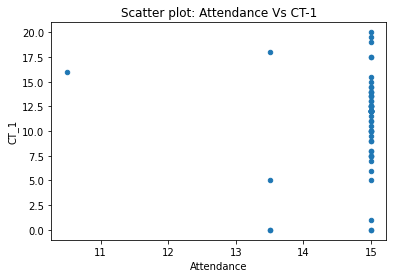

In [0]:
df.plot.scatter(x='Attendance',y='CT_1',title='Scatter plot: Attendance Vs CT-1');

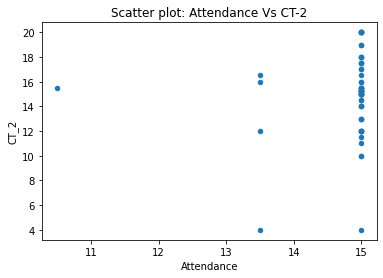

In [0]:
df.plot.scatter(x='Attendance',y='CT_2',title='Scatter plot: Attendance Vs CT-2');

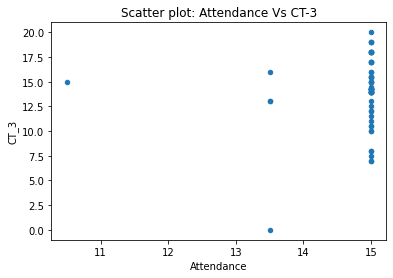

In [0]:
df.plot.scatter(x='Attendance',y='CT_3',title='Scatter plot: Attendance Vs CT-3');

A student is class has scored relatively good marks when compared to others who have good attendance, This guy proved self study is best but other guys seem too studious, attending classes much.

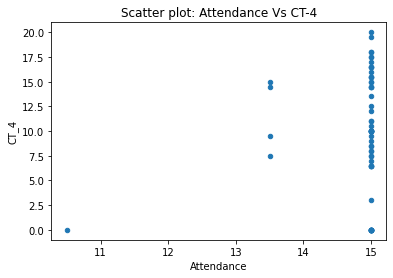

In [0]:
df.plot.scatter(x='Attendance',y='CT_4',title='Scatter plot: Attendance Vs CT-4');

In all tests other than CT-4, that student was able to score good,
But in CT-4 he dint score well or maybe he is absent.

In [0]:
unique_index = pd.Index(list(df['Attendance']))
df.iloc[unique_index.get_loc(df['Attendance'].min())]
print("CT-1 mean: ") 
print(df['CT_1'].mean())
print("CT-2 mean: ") 
print(df['CT_2'].mean())
print("CT-3 mean: ") 
print(df['CT_3'].mean())
print("CT-4 mean: ") 
print(df['CT_4'].mean())
print("ExamMark105 mean: ") 
print(df['ExamMark105'].mean())
print("ExamMark105_1 mean: ") 
print(df['ExamMark105_1'].mean())


CT-1 mean: 
11.11111111111111
CT-2 mean: 
15.035714285714286
CT-3 mean: 
14.01984126984127
CT-4 mean: 
9.880952380952381
ExamMark105 mean: 
35.904761904761905
ExamMark105_1 mean: 
57.8531746031746


Examining  means of CTs to understand how they are related to attendance

In [0]:
unique_index = pd.Index(list(df['Attendance']))
df.iloc[unique_index.get_loc(df['Attendance'].min())]

Roll              47.0
CT_1              16.0
CT_2              15.5
CT_3              15.0
CT_4               0.0
CT_best           46.5
Attendance        10.5
Observation       13.5
Total             70.5
ExamMark105        9.0
ExamMark105_1     57.0
Marks_Total      136.5
Name: 45, dtype: float64

This is info of that talented student who has less attendance but scored well compared to others

The student with minimum attendance has crossed average marks of all CTs (except one-maybe he is absent for that) but he got less than average in next Exams (105 and 105.1)

Observing overall class performance,

* Mean marks of class reduced too much after first 3 CTs
* In CT-4, class not only performed really bad but also some students were absent to the exam too......




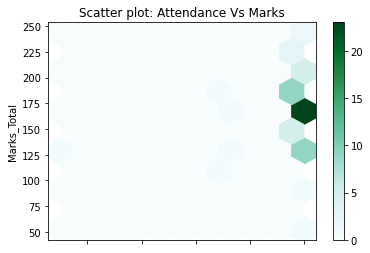

In [0]:
df.plot.hexbin(x='Attendance',y='Marks_Total',gridsize=10,title='Scatter plot: Attendance Vs Marks');

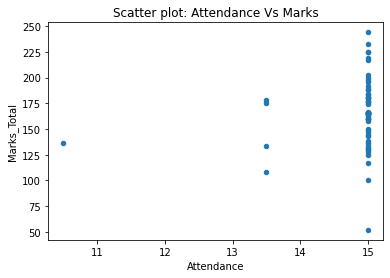

In [0]:
df.plot.scatter(x='Attendance',y='Marks_Total',title='Scatter plot: Attendance Vs Marks');

One guy who is not regular got marks higher than some people who regularly attended classes..

From Graph,

*   The Student who got less than 100marks has 100% attendance..
*   Students with marks more than 200 have 100% attendance..



In [0]:
df['Marks_Total'].describe()

count     63.000000
mean     165.313492
std       33.039961
min       52.000000
25%      145.500000
50%      165.250000
75%      180.750000
max      244.000000
Name: Marks_Total, dtype: float64

50% of the class is above average